In [1]:
#libs imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import mpld3
mpld3.enable_notebook()
%matplotlib inline
import sklearn as skl
import math
import datetime
import time
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
#read data in the pandas by parsig the date as index column

df = pd.read_csv('gogl.us.txt',
                  header=0, 
                  index_col='Date',
                  parse_dates=True)


In [3]:
df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2005-02-25,141.94,143.84,141.20,143.18,89902,0
2005-02-28,143.70,147.19,139.47,143.14,124965,0
2005-03-01,141.79,142.57,131.36,134.50,229663,0
2005-03-02,135.27,139.11,135.06,137.56,88113,0
2005-03-03,138.59,138.59,132.24,134.89,120294,0


In [4]:
del df['OpenInt']

In [5]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2005-02-25,141.94,143.84,141.20,143.18,89902
2005-02-28,143.70,147.19,139.47,143.14,124965
2005-03-01,141.79,142.57,131.36,134.50,229663
2005-03-02,135.27,139.11,135.06,137.56,88113
2005-03-03,138.59,138.59,132.24,134.89,120294


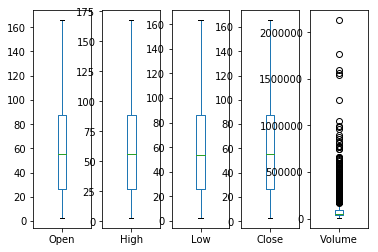

In [6]:
# visualzation of data using box plot
df.plot(kind='box',subplots=True,layout=(1,5),sharex=False,sharey=False)
plt.show()

In [7]:
#data types analysed
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [8]:
#float(dtype) to 2 decimal values to avoid error due to inconsistency in decimal values

df.Open = df.Open.round(2) 
df.High = df.High.round(2)
df.Low = df.Low.round(2)
df.Close = df.Close.round(2)

In [9]:
#Calculated the percentage change between the attributes

df['OC_change'] = (df['Open'] - df['Close'])/ df['Close']*100
df['HL_change'] = (df['High'] - df['Low'])/ df['Low']*100

In [10]:
df.tail()

,Open,High,Low,Close,Volume,OC_change,HL_change
Date,,,,,,,
2017-11-06,7.91,8.32,7.91,8.25,565788,-4.121212,5.183312
2017-11-07,8.22,8.22,8.07,8.17,206210,0.611995,1.858736
2017-11-08,8.18,8.20,8.02,8.07,285029,1.363073,2.244389
2017-11-09,7.86,8.00,7.85,7.88,125624,-0.253807,1.910828
2017-11-10,7.93,8.02,7.87,7.88,138800,0.634518,1.905972


In [11]:
df.head()

,Open,High,Low,Close,Volume,OC_change,HL_change
Date,,,,,,,
2005-02-25,141.94,143.84,141.20,143.18,89902,-0.866043,1.869688
2005-02-28,143.70,147.19,139.47,143.14,124965,0.391225,5.535241
2005-03-01,141.79,142.57,131.36,134.50,229663,5.420074,8.533800
2005-03-02,135.27,139.11,135.06,137.56,88113,-1.664728,2.998667
2005-03-03,138.59,138.59,132.24,134.89,120294,2.742976,4.801875


In [12]:
#populating the dataframe by the required fields

df = df[['OC_change','HL_change','Close','Volume']]

In [13]:
len(df)

3201

In [14]:
#defining the features and lables
#shift the close feautre
forecast_col = 'Close'
forecast_out =  int(math.ceil(0.01*len (df)))
df['label'] = df[forecast_col].shift(-forecast_out)
df['label'].tail()


Date
2017-11-06   NaN
2017-11-07   NaN
2017-11-08   NaN
2017-11-09   NaN
2017-11-10   NaN
Name: label, dtype: float64

In [15]:
#null values handled
df.dropna(inplace = True)

In [16]:
df.tail()

,OC_change,HL_change,Close,Volume,label
Date,,,,,
2017-09-20,0.110375,2.449889,9.06,171080,8.25
2017-09-21,3.099885,3.218391,8.71,226283,8.17
2017-09-22,2.985075,3.690888,8.71,144074,8.07
2017-09-25,4.059041,5.334988,8.13,357499,7.88
2017-09-26,0.125628,2.298851,7.96,255838,7.88


In [17]:
#Features to apply linear Regression

X = np.array(df.drop(['label'],1))
Y = np.array(df['label'])


In [18]:
len(X)

3168

In [19]:
#dividing the features and labels into test and train set

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [20]:
#linear regression

clf = LinearRegression()

In [21]:
clf.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
#Accuracy of the algorithm
accuracy=clf.score(x_test, y_test)
accuracy

0.93946023243007326

In [23]:
#Predicting the stocks for the forecasted set

Forecast_set = clf.predict(X_lately)
X = X[:-forecast_out]
Y = Y[:-forecast_out]
X_lately = X[-forecast_out:]
Y_lately = Y[-forecast_out:]



NameError: name 'X_lately' is not defined

In [ ]:
#Predicted stock prices
Forecast_set

In [ ]:
style.use('ggplot')

df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix  = last_date.timestamp()
one_day = 86400
next_unix = last_unix+one_day

for i in Forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Close'].plot()    
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [24]:
df['Forecast'].tail()

KeyError: 'Forecast'